In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('Advertising.csv',index_col=0)
print(data.shape)
print(data.columns)
type(data)

(200, 4)
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


pandas.core.frame.DataFrame

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


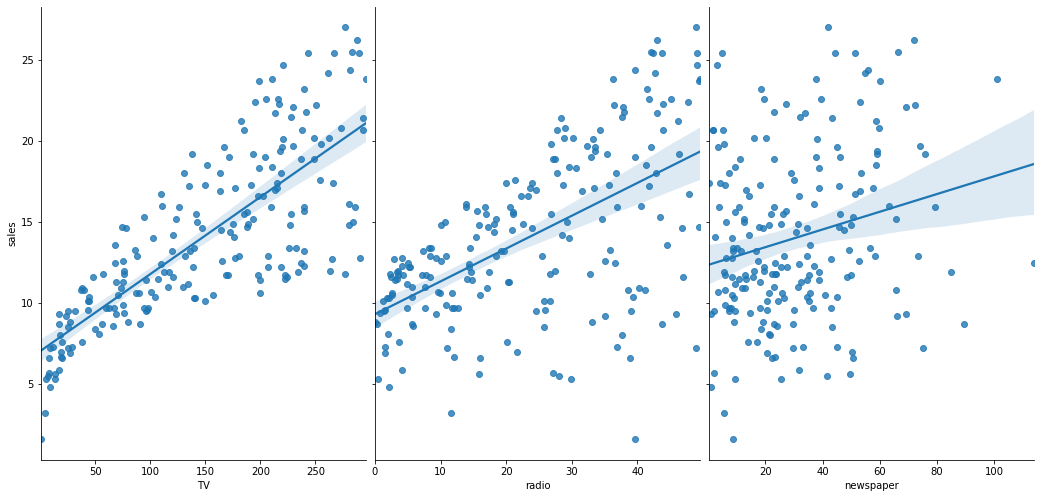

In [3]:
sns.pairplot(data,x_vars=data.columns[:3],y_vars=data.columns[3:],size=7,aspect=0.7,kind='reg')

In [15]:
import sklearn 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn.model_selection import train_test_split

In [16]:
X = data[['TV']]
Y = data['sales']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state = 42)
lm.fit(X_train, Y_train)

LinearRegression()

In [18]:
lm.coef_

array([0.04816674])

In [19]:
Y_train.shape

(120,)

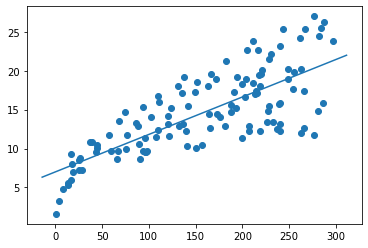

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)
slope = lm.coef_[0]
intercept = 7 
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals)

In [22]:
Predict = lm.predict(X_test)

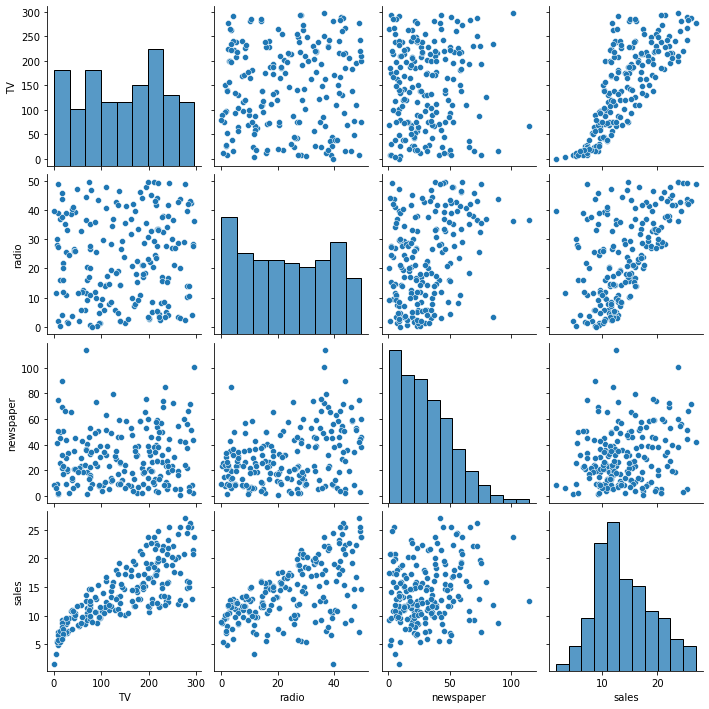

In [23]:
sns.pairplot(data)

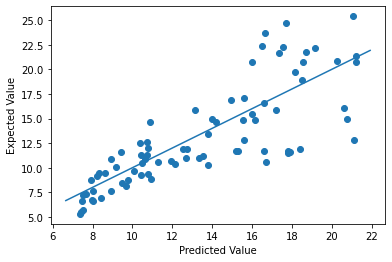

In [24]:
plt.scatter(Predict, Y_test)
# plt.scatter(X, Y)

slope = 1
intercept = 0
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.xlabel("Predicted Value")
plt.ylabel("Expected Value")
plt.plot(x_vals, y_vals)

In [25]:
mae = sklearn.metrics.mean_absolute_error(Predict, Y_test)
mae

2.283170372702572

In [26]:
mse = sklearn.metrics.mean_squared_error(Predict, Y_test)
mse

9.245846487500001

In [27]:
rmse = sklearn.metrics.mean_squared_error(Predict, Y_test)
np.sqrt(rmse)

3.040698355230259

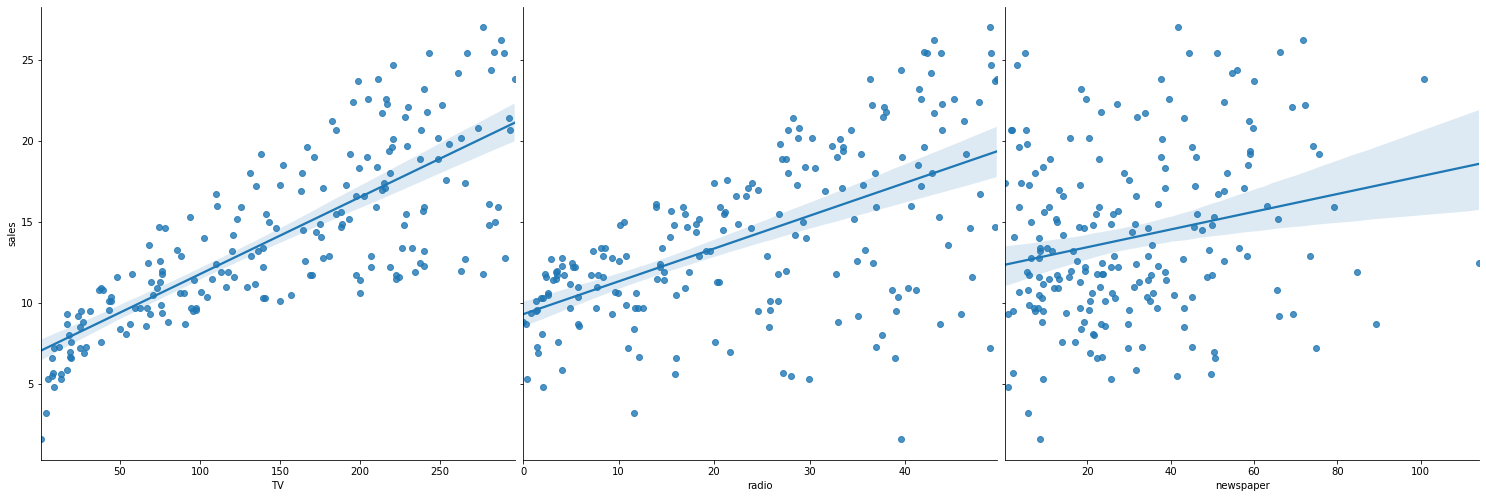

In [28]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales',height = 7,  kind='reg')

In [4]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [5]:
feature_cols=data.columns[:3]
#feature_cols = ['TV','radio','newspaper']   
X=data[feature_cols]

result_cols= data.columns[3:]
#result_cols= ['sales']
Y=data[result_cols]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
#default size is test_size=0.25 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 3)
(120, 1)
(80, 3)
(80, 1)


In [6]:
lnrg = LinearRegression()
lnrg.fit(x_train,y_train)

#formula of linear regression is y = bias + [coef1]x1 + [coef2]x2 + [coef3]x3... 

print("linear regression bias or intercept   => ",lnrg.intercept_)   #intercept=bias
print("linear regression coefficient         => ",lnrg.coef_)
print("feature columns                       => ",feature_cols)

linear regression bias or intercept   =>  [2.47716598]
linear regression coefficient         =>  [[ 0.04848718  0.19089161 -0.00122897]]
feature columns                       =>  Index(['TV', 'radio', 'newspaper'], dtype='object')


In [7]:
y_hat = lnrg.predict(x_test)
print( np.sqrt(metrics.mean_squared_error(y_test,y_hat)) )

#the less score the better

1.658110858922464


In [8]:
# Root Mean Square error wth TV and radio as features 
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.694077488459195

In [9]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.7078048629806954

In [10]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.9191928021187183

In [11]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=data[feature_cols]
    Y=data.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

3.012072124113509

# using cross validation to check best features

In [12]:
feature_cols = ['TV','radio','newspaper']
X=data[feature_cols]
Y=data.sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())


1.6913531708051797


In [13]:
feature_cols = ['TV','radio']
X=data[feature_cols]
Y=data.sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6796748419090768
